In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [115]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/data/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [176]:
X = diabetes_data.drop("Outcome",axis = 1)
z = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [118]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [177]:
z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**### EDA**

In [178]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [179]:
z.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [180]:
corr_matrix = z.corr()

In [181]:
corr_matrix["Glucose"].sort_values(ascending=False)

Glucose                     1.000000
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6a1d16990>,
      dtype=object)

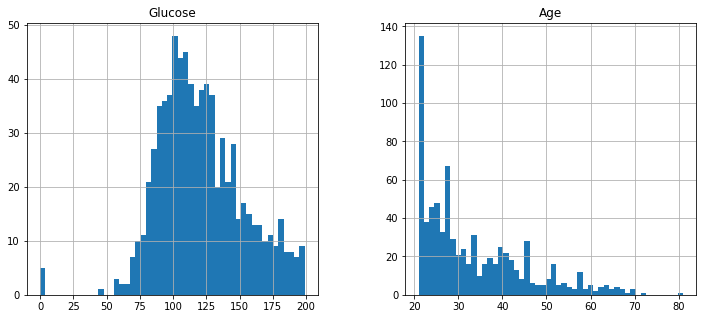

In [182]:
z[['Glucose', 'Age']].hist(bins=50, figsize=(12,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6a1a361d0>,
      dtype=object)

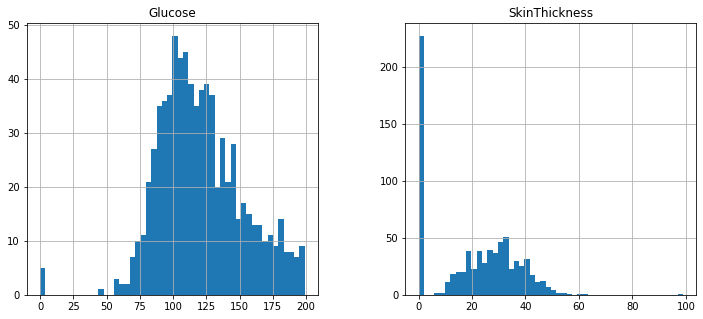

In [183]:
z[['Glucose', 'SkinThickness']].hist(bins=50, figsize=(12,5))

In [184]:
z = z.drop(['SkinThickness'], axis = 1)

# **Model Train**

# Decision Tree

NEW Pridiction

In [185]:
#importing train_test_split
from sklearn.model_selection import train_test_split
z_train,z_test,y_train,y_test = train_test_split(z,y,test_size=1/3,random_state=42, stratify=y)

In [186]:
#new DT to check
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.746


OLD prediction

In [187]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [188]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [121]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.730


In [122]:
y_pred = dt.predict(X_test)


In [123]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[145  22]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       167
           1       0.66      0.47      0.55        89

    accuracy                           0.73       256
   macro avg       0.71      0.67      0.68       256
weighted avg       0.72      0.73      0.72       256



In [124]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

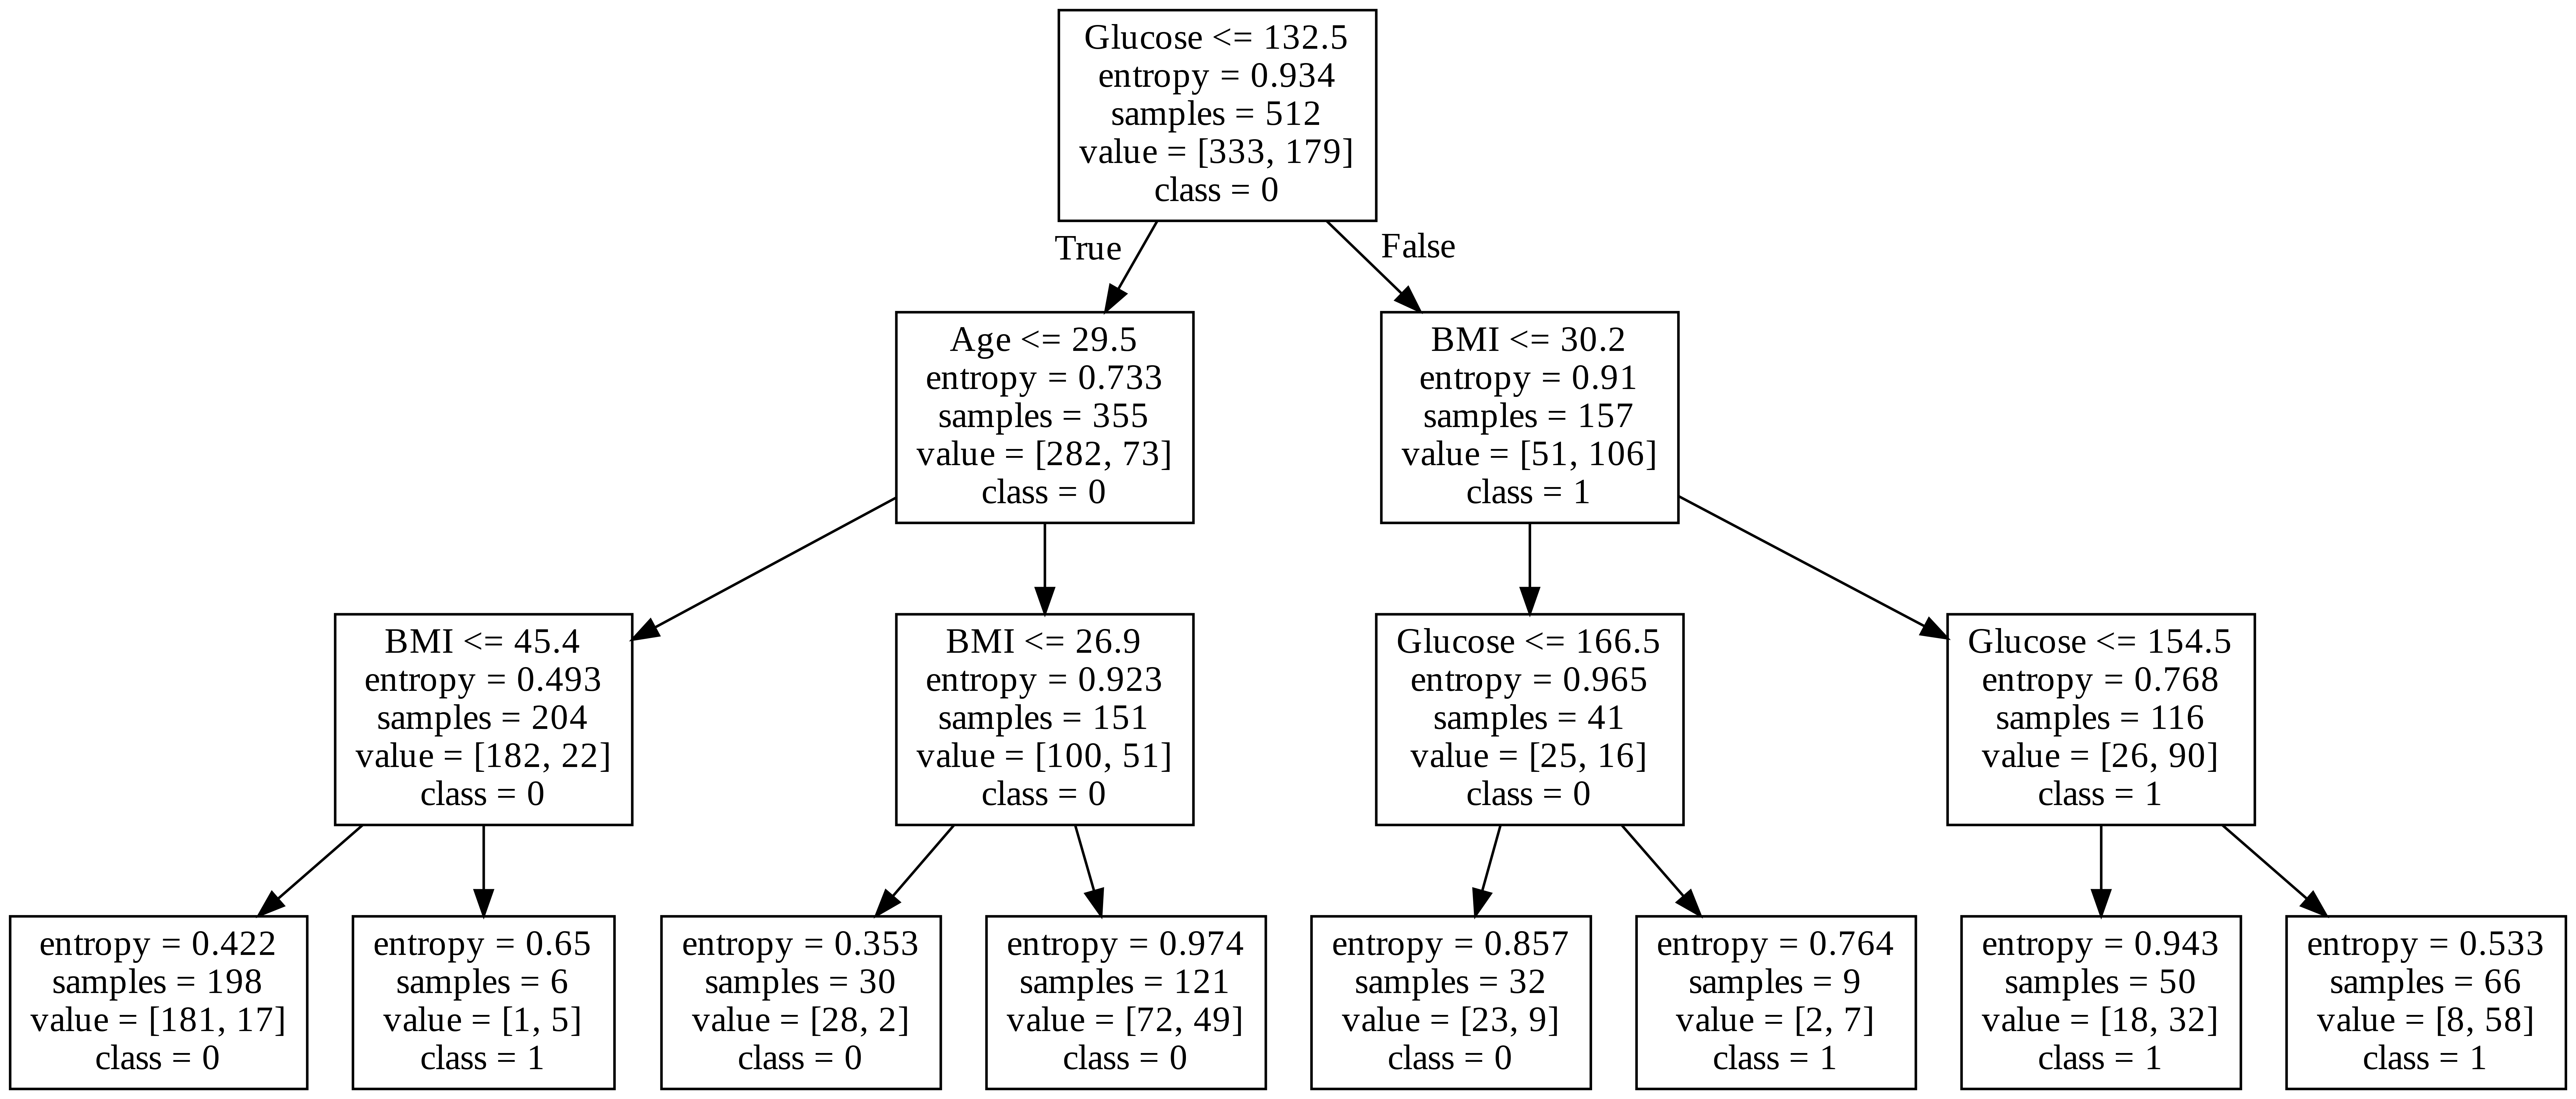

In [125]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

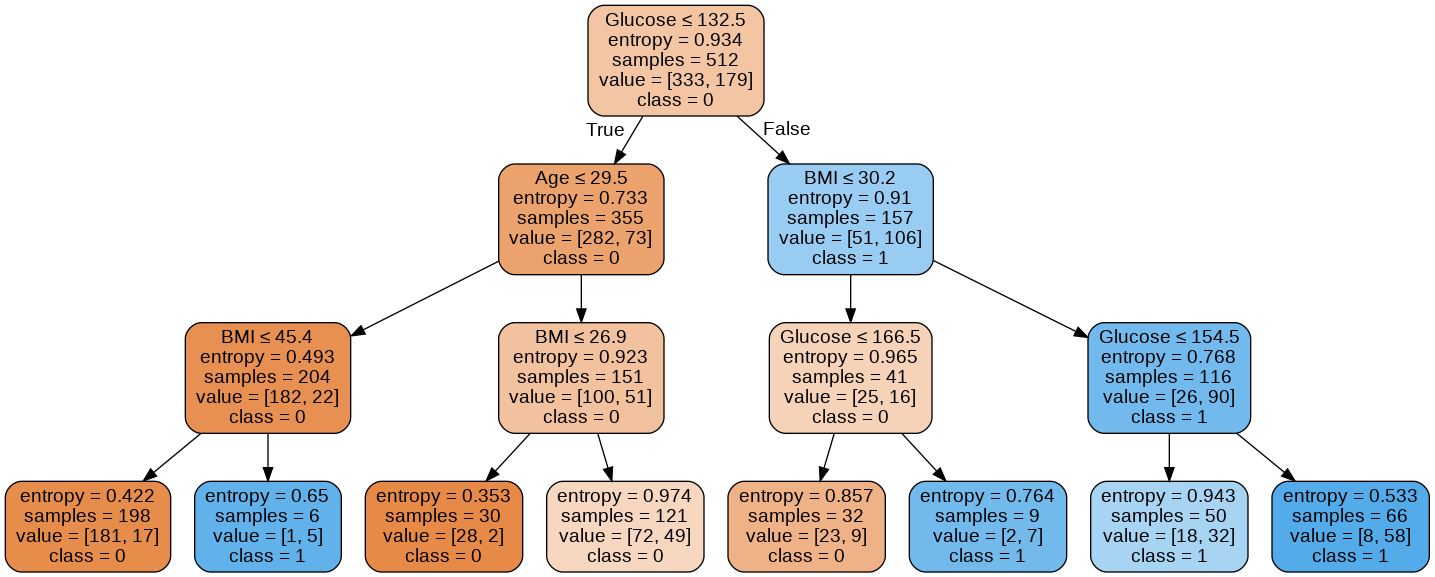

In [126]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [127]:
#Plot ROC chart for DT.Write your code below.
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [128]:
y_scores = dt.predict_proba(X_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

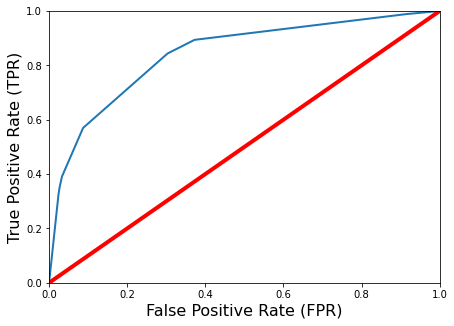

In [129]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [130]:
#Adjust the decision tree parameters to improve the performance.Write your code below.



In [131]:
#find out the feature importance from the decision tree built above. Write your code below.


# NN

In [132]:

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [133]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.85665199
Iteration 2, loss = 0.84534632
Iteration 3, loss = 0.83388014
Iteration 4, loss = 0.82304229
Iteration 5, loss = 0.81233398
Iteration 6, loss = 0.80175822
Iteration 7, loss = 0.79145139
Iteration 8, loss = 0.78129142
Iteration 9, loss = 0.77152197
Iteration 10, loss = 0.76124823
Iteration 11, loss = 0.75196890
Iteration 12, loss = 0.74223303
Iteration 13, loss = 0.73263596
Iteration 14, loss = 0.72358010
Iteration 15, loss = 0.71452349
Iteration 16, loss = 0.70486896
Iteration 17, loss = 0.69586422
Iteration 18, loss = 0.68674206
Iteration 19, loss = 0.67787145
Iteration 20, loss = 0.66928385
Iteration 21, loss = 0.66060863
Iteration 22, loss = 0.65244228
Iteration 23, loss = 0.64460176
Iteration 24, loss = 0.63665935
Iteration 25, loss = 0.62941221
Iteration 26, loss = 0.62253568
Iteration 27, loss = 0.61600824
Iteration 28, loss = 0.60938530
Iteration 29, loss = 0.60310458
Iteration 30, loss = 0.59722263
Iteration 31, loss = 0.59170385
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [134]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.73828125
[[137  30]
 [ 37  52]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       167
           1       0.63      0.58      0.61        89

    accuracy                           0.74       256
   macro avg       0.71      0.70      0.71       256
weighted avg       0.73      0.74      0.74       256



In [135]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.883
Accuracy on test set: 0.738


In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

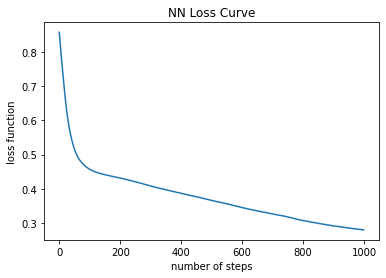

In [137]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [138]:
#check out weights

In [139]:
(mlp.intercepts_[0]).shape

(10,)

In [140]:
(mlp.coefs_[0]).shape

(8, 10)

In [141]:
mlp.intercepts_[0]

array([ 0.16110636,  0.70331802,  0.88132218, -0.23653051,  0.12484308,
       -0.59751568, -0.25978143, -0.30691485, -0.36962779,  0.1527712 ])

In [142]:
mlp.coefs_[0]

array([[ 0.42686355, -0.16543261,  0.17959341,  0.38109078,  0.56175791,
         0.76484694, -0.25641434,  1.11928188,  0.22661927, -0.01964915],
       [ 0.81348149, -0.67657678, -0.33882606, -0.7730307 , -0.15295162,
         0.86877984,  0.08384231, -0.37503559,  0.12983567, -0.70628773],
       [-0.42983602,  0.17553612,  0.36329612,  0.27533004, -0.48863678,
        -0.12832287, -0.01404974, -0.22029332, -0.55204743, -0.97593469],
       [ 0.30753178,  0.83514126,  0.19008897, -0.33460446,  1.07104271,
         0.02813079,  0.85989866,  0.1159741 , -0.58935913, -0.5076993 ],
       [-0.71194756, -0.54117606, -0.22406396, -1.31635635, -0.22415299,
         0.11336568, -0.55041313, -0.10661525,  0.00428976,  0.25005499],
       [ 0.05247755,  0.79452173, -0.26476071,  0.12736828, -0.25665577,
         0.58146985, -0.40815676, -0.5878228 ,  0.2990945 , -0.66673526],
       [ 0.50527439, -0.06336474, -0.50771727,  0.45872785, -0.64409595,
         0.23843419,  0.03931454, -0.66424847

In [143]:

#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.


# SVM

In [144]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)

from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  


r= 0.1 C= 1
Accuracy= 0.75390625
[[143  24]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.56      0.61        89

    accuracy                           0.75       256
   macro avg       0.73      0.71      0.72       256
weighted avg       0.75      0.75      0.75       256

r= 0.1 C= 10
Accuracy= 0.7109375
[[134  33]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       167
           1       0.59      0.54      0.56        89

    accuracy                           0.71       256
   macro avg       0.68      0.67      0.67       256
weighted avg       0.71      0.71      0.71       256

r= 1 C= 1
Accuracy= 0.70703125
[[150  17]
 [ 58  31]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       167
           1       0.65      0.35      0.45        89

    accuracy    

# deployment 

In [145]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)


[0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]


In [153]:
#score the model on a scoring data set
accuracy = accuracy_score(y_test, pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  73.828125


In [154]:
#diabetes_score_data = pd.read_csv('.....csv')
diabetes_score_data = pd.read_csv('/content/data/diabetes.csv')

In [155]:
#sc_X = StandardScaler
sc_x = StandardScaler()

In [ ]:
#X =  sc_X.fit_transform(diabetes_score_data)
X = sc_x.

In [ ]:
#pred = loaded_model.predict(X)
pred = loaded_model.predict(X_test)

In [ ]:
#print(pred)
print(pred)

In [147]:
np.savetxt("d:/f.csv", pred, fmt="%d", delimiter=",")

FileNotFoundError: ignored

# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html